# HOUSE PREDICTION MODEL PROJECT

#### Github link: https://github.com/dev-ezzy/House_price-prediction-model.git
## BUSINESS STAKEHOLDER
 The real estate agency 

## BUSINESS PROBLEM 
A real estate agency wants to analyze the factors that influence the prices of houses in order to provide accurate pricing estimates to their clients. The agency aims to understand the relationship between various features of a house, such as the number of rooms, living area, basement area, overall quality, and other relevant factors, and how they affect the sale price.

The clients being, homeowners and potential house buyers have difficulty in making informed decisions regarding property investments, to make this decision, understanding the factors influencing housing prices in a specific area is necessary.
## OBJECTIVES
REAL ESTATE AGENCY
- To identify the locations with the highest sales prices.
- To identify how seasonal trends affect sales.
- To predict prices of houses depending on the features.



Importing the necessary libraries that will be used to perform analysis on our data 

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('kc_house_data.csv')
areas = pd.read_csv('deliverylocations.csv')

Defining functions to load and view the data

In [156]:
# loading data

def description_data(data):
    data = pd.read_csv(data)
    print("\n.............Info:.................")
    print(data.info())
    print("\n.............Describe:...............")
    data_description = data.describe()
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        print(data_description)
    print("\n.............Head:.................")
    print(data.head())
    return data


In [157]:
description_data('kc_house_data.csv')


.............Info:.................
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat          

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


### Loading and inspecting columns of our second data set "Deliverylocation-csv

In [158]:
description_data('deliverylocations.csv')


.............Info:.................
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Zip Code    113 non-null    object
 1   City        113 non-null    object
 2   Zip Code.1  113 non-null    object
 3   City.1      113 non-null    object
 4   Zip Code.2  113 non-null    object
 5   City.2      113 non-null    object
 6   Zip Code.3  70 non-null     object
 7   City.3      70 non-null     object
dtypes: object(8)
memory usage: 7.2+ KB
None

.............Describe:...............
       Zip Code      City Zip Code.1  City.1 Zip Code.2   City.2 Zip Code.3  \
count       113       113        113     113        113      113         70   
unique      100        76        101      44         87       46         63   
top       98001  Bellevue      98439  Tacoma      98148  Seattle      98198   
freq          3         7          3      32          4    

,Zip Code,City,Zip Code.1,City.1,Zip Code.2,City.2,Zip Code.3,City.3
0,98001,Algona,98051,Ravendale,98121,Seattle,98194,Seattle
1,98001,Auburn,98052,Redmond,98122,Seattle,98195,Seattle
2,98001,Federal Way,98053,Redmond,98124,Seattle,98198,Des Moines
3,98002,Auburn,98054,Renton,98125,Seattle,98198,Seatac
4,98003,Federal Way,98055,Renton,98126,Seattle,98198,Seattle
...,...,...,...,...,...,...,...,...
108,98371,Puyallup,98446,Tacoma,98572,Pe Ell,NaN,NaN
109,98372,Edgewood,98447,Tacoma,98576,Rainier,NaN,NaN
110,98372,Puyallup,98448,Parkland,98579,Rochester,NaN,NaN
111,98373,Puyallup,98448,Tacoma,98580,Roy,NaN,NaN


# Dealing with Null values or missing data

### 1.Sorting out  null values in our house data
Looking at the information above we can see only three columns have missing values, that is; "waterfront", "view" and "yr_renovated". Every house has its own unique features and not all are the same. Some houses contain certain features while others lack them. Since this is real world data, we can account for missing values in "waterfront" and "view" columns by saying not all houses are build the same and those lacking the two features have caused our data on the two columns to be inconsitent with the rest of the other columns. The "yr_renovated" column can also be accounted for by saying not all houses undergo renovation. Houses build earlier might need renovation but recent houses do not require renovation hence the missing values in the column
 

In [159]:
# Using mode to impute missing values
# Python function to impute missing values

def replace_missing_with_mode(data, column_name):
    mode_value = data[column_name].mode().iloc[0]  
    data[column_name].fillna(mode_value, inplace =True)

In [160]:
# columns to be imputed
replace_missing_with_mode(data,'view')
replace_missing_with_mode(data, 'waterfront')

### 2.Sorting missing values in our delivery location dataset("areas)

Dropping the Nan values in the delivery "areas" columns

In [161]:
areas.dropna()

,Zip Code,City,Zip Code.1,City.1,Zip Code.2,City.2,Zip Code.3,City.3
0,98001,Algona,98051,Ravendale,98121,Seattle,98194,Seattle
1,98001,Auburn,98052,Redmond,98122,Seattle,98195,Seattle
2,98001,Federal Way,98053,Redmond,98124,Seattle,98198,Des Moines
3,98002,Auburn,98054,Renton,98125,Seattle,98198,Seatac
4,98003,Federal Way,98055,Renton,98126,Seattle,98198,Seattle
...,...,...,...,...,...,...,...,...
65,98315,Silverdale,98387,Spanaway,98498,Lakewood,98593,Vader
66,98321,Buckley,98388,Steilacoom,98498,Tacoma,98595,Westport
67,98322,Burley,98390,Bonney Lake,98499,JBLM,98596,Chehalis
68,98323,Carbonado,98390,Sumner,98499,Lakewood,98596,Winlock


Changing our dates columns to datetime data types

In [162]:
# Changing our date from object to datetime data type
data['date'] = pd.to_datetime(data['date'])
data['yr_renovated'] = pd.to_datetime(data['yr_renovated'])

After checking for null values, we check for any duplicated values in the data.

In [163]:
# Checking for duplicated values in our data
data.duplicated().sum()

0

In [164]:
# drop the rows in sqft_basement with a '?'
data= data.drop(data[data.sqft_basement == '?'].index)


Creating a new column 'Grade_1' that stores our new 'grade' column  after getting rid of the string 'grade' and converting it to a numeric datatype  

In [165]:
data["Grade_1"] = data["grade"].str.split().apply(lambda x: x[0])
# Convert the Grade1 column to an integer.
data["Grade_1"] = pd.to_numeric(data["Grade_1"])

### Converting the categorical columns to numerical data types

We are converting the following categorical data "Waterfront", "View" and  "grade" into numerical data  types.

In [166]:

data['view_1'] = data['view'].replace({'NONE': 0,'FAIR':1,'AVERAGE': 2,'GOOD':3, 'EXCELLENT':4})
data['waterfront_1'] = data['waterfront'].replace({'YES': 0, 'NO':1})
data['condition1'] = data['condition'].replace({'Poor': 0, 'Fair':1,'Average':2,'Good':3,'Very Good':4})


Since we have already replaced the strings in our categorical data with numeric values we can drop the original columns 

In [167]:
data.drop(columns = ['waterfront', 'view', 'grade','condition', ], inplace= True)

 Delivery locations (zip codes) data 

In [168]:
# Create a new dataframe with two columns for zip codes and cities
new_areas = pd.DataFrame(columns=['Zip Code', 'City'])

# Iterate over the original dataframe and extract zip codes and cities
for i in range(0, len(areas.columns), 2):
    # Skip the columns that are not zip codes
    if i % 2 != 0:
        continue
    # Extract the zip codes and cities from each pair of columns
    zip_codes = areas.iloc[:, i]
    cities = areas.iloc[:, i + 1]
    # Append the zip codes and cities to the new dataframe
    new_areas = pd.DataFrame({'Zip Code': zip_codes, 'City': cities})

# Print the new dataframe
print(new_areas)

    Zip Code        City
0      98194     Seattle
1      98195     Seattle
2      98198  Des Moines
3      98198      Seatac
4      98198     Seattle
..       ...         ...
108      NaN         NaN
109      NaN         NaN
110      NaN         NaN
111      NaN         NaN
112      NaN         NaN

[113 rows x 2 columns]


In [169]:
new_areas.isnull().sum()
new_areas.dropna()

,Zip Code,City
0,98194,Seattle
1,98195,Seattle
2,98198,Des Moines
3,98198,Seatac
4,98198,Seattle
...,...,...
65,98593,Vader
66,98595,Westport
67,98596,Chehalis
68,98596,Winlock


In [170]:
#renaming to match our first data set
new_areas = new_areas.rename(columns={"Zip Code": "zipcode"})
new_areas

,zipcode,City
0,98194,Seattle
1,98195,Seattle
2,98198,Des Moines
3,98198,Seatac
4,98198,Seattle
...,...,...
108,NaN,NaN
109,NaN,NaN
110,NaN,NaN
111,NaN,NaN


# Merging datasets

Next we are going to merge our data sets using a common column between the two tables. We are doing this because we want to use the merged data set to retrieve locations of houses in our analysis. This can help us further our research like identifying locations with most houses, most expensive areas etc.

In [171]:
#merging our data sets
new_areas['zipcode'] = new_areas['zipcode'].astype(str)
data['zipcode'] = new_areas['zipcode'].astype(str)


merged_data = pd.merge(new_areas, data , on='zipcode') 
merged_data

,zipcode,City,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,Grade_1,view_1,waterfront_1,condition1
0,98194,Seattle,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,...,1955,1970-01-01 00:00:00.000000000,47.5112,-122.257,1340,5650,7,0,1,2
1,98195,Seattle,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,...,1951,1970-01-01 00:00:00.000001991,47.7210,-122.319,1690,7639,7,0,1,2
2,98198,Des Moines,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,...,1933,NaT,47.7379,-122.233,2720,8062,6,0,1,2
3,98198,Des Moines,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,...,1965,1970-01-01 00:00:00.000000000,47.5208,-122.393,1360,5000,7,0,1,4
4,98198,Des Moines,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,...,1987,1970-01-01 00:00:00.000000000,47.6168,-122.045,1800,7503,8,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1839,nan,NaN,3530510041,2014-07-23,188500.0,2,1.75,1240,2493,1.0,...,1985,1970-01-01 00:00:00.000000000,47.3813,-122.322,1270,4966,8,0,1,3
1840,nan,NaN,1853000400,2015-03-05,680000.0,4,2.50,3140,28037,2.0,...,1991,1970-01-01 00:00:00.000000000,47.7304,-122.082,2990,35001,10,0,1,3
1841,nan,NaN,3134100116,2014-08-27,470000.0,5,1.75,2030,12342,2.0,...,1942,1970-01-01 00:00:00.000000000,47.6417,-122.109,2500,9433,7,0,1,3
1842,nan,NaN,9545230140,2014-07-25,597750.0,4,2.50,2310,9624,2.0,...,1984,NaT,47.5386,-122.053,1940,9636,8,0,1,2


In [172]:
merged_data.isnull().sum()
#dropping the rows with null values
new_data = merged_data.dropna()

# Data visualization (EDA)
Now we have checked for abnormalities in the data, we can go ahead and plot the data to explore the distribution, relationships and patterns in the data. This will also help us in identifying outliers and trends.

Visualizing the top ten cities in Washington Dc with the most houses from our data sets

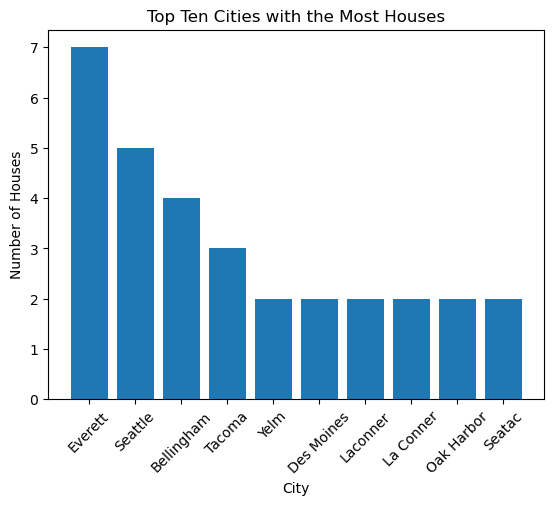

In [173]:
def create_bar_graph(data):
    # Count the occurrences of each city
    city_counts = data['City'].value_counts()

    # Select the top ten cities
    top_cities = city_counts.head(10)

    # Create a bar graph
    plt.bar(top_cities.index, top_cities.values)
    plt.xlabel('City')
    plt.ylabel('Number of Houses')
    plt.title('Top Ten Cities with the Most Houses')
    plt.xticks(rotation=45)
    plt.show()
    

# Example usage:
create_bar_graph(new_data)

Visualizing top ten cities with the most expensive house prices in Washington Dc

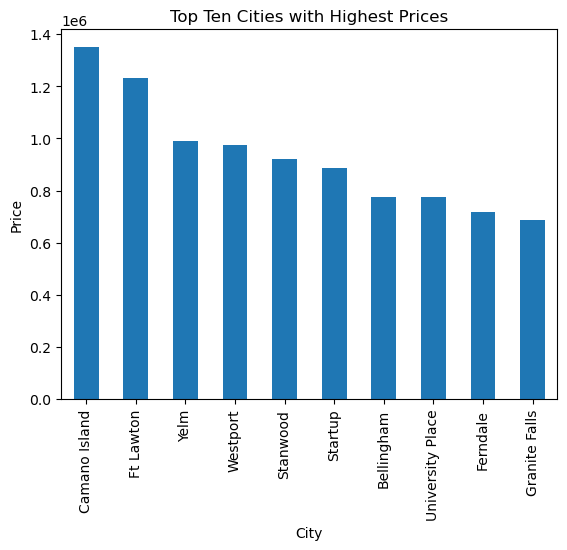

In [174]:
city_prices = new_data.groupby('City')['price'].mean()

# Select the top ten cities with the highest mean prices
top_ten_cities = city_prices.nlargest(10)

# Create a bar graph
top_ten_cities.plot(kind='bar', xlabel='City', ylabel='Price', title='Top Ten Cities with Highest Prices')

# Show the plot
plt.show()

Specifying X and y axis values in order to plot scatterplots and understand the relationship between our columns and dropping columns we dont need

In [175]:
y = data["price"]
X = data.drop(["yr_renovated","zipcode"], axis=1)

Plotting the scatter plots

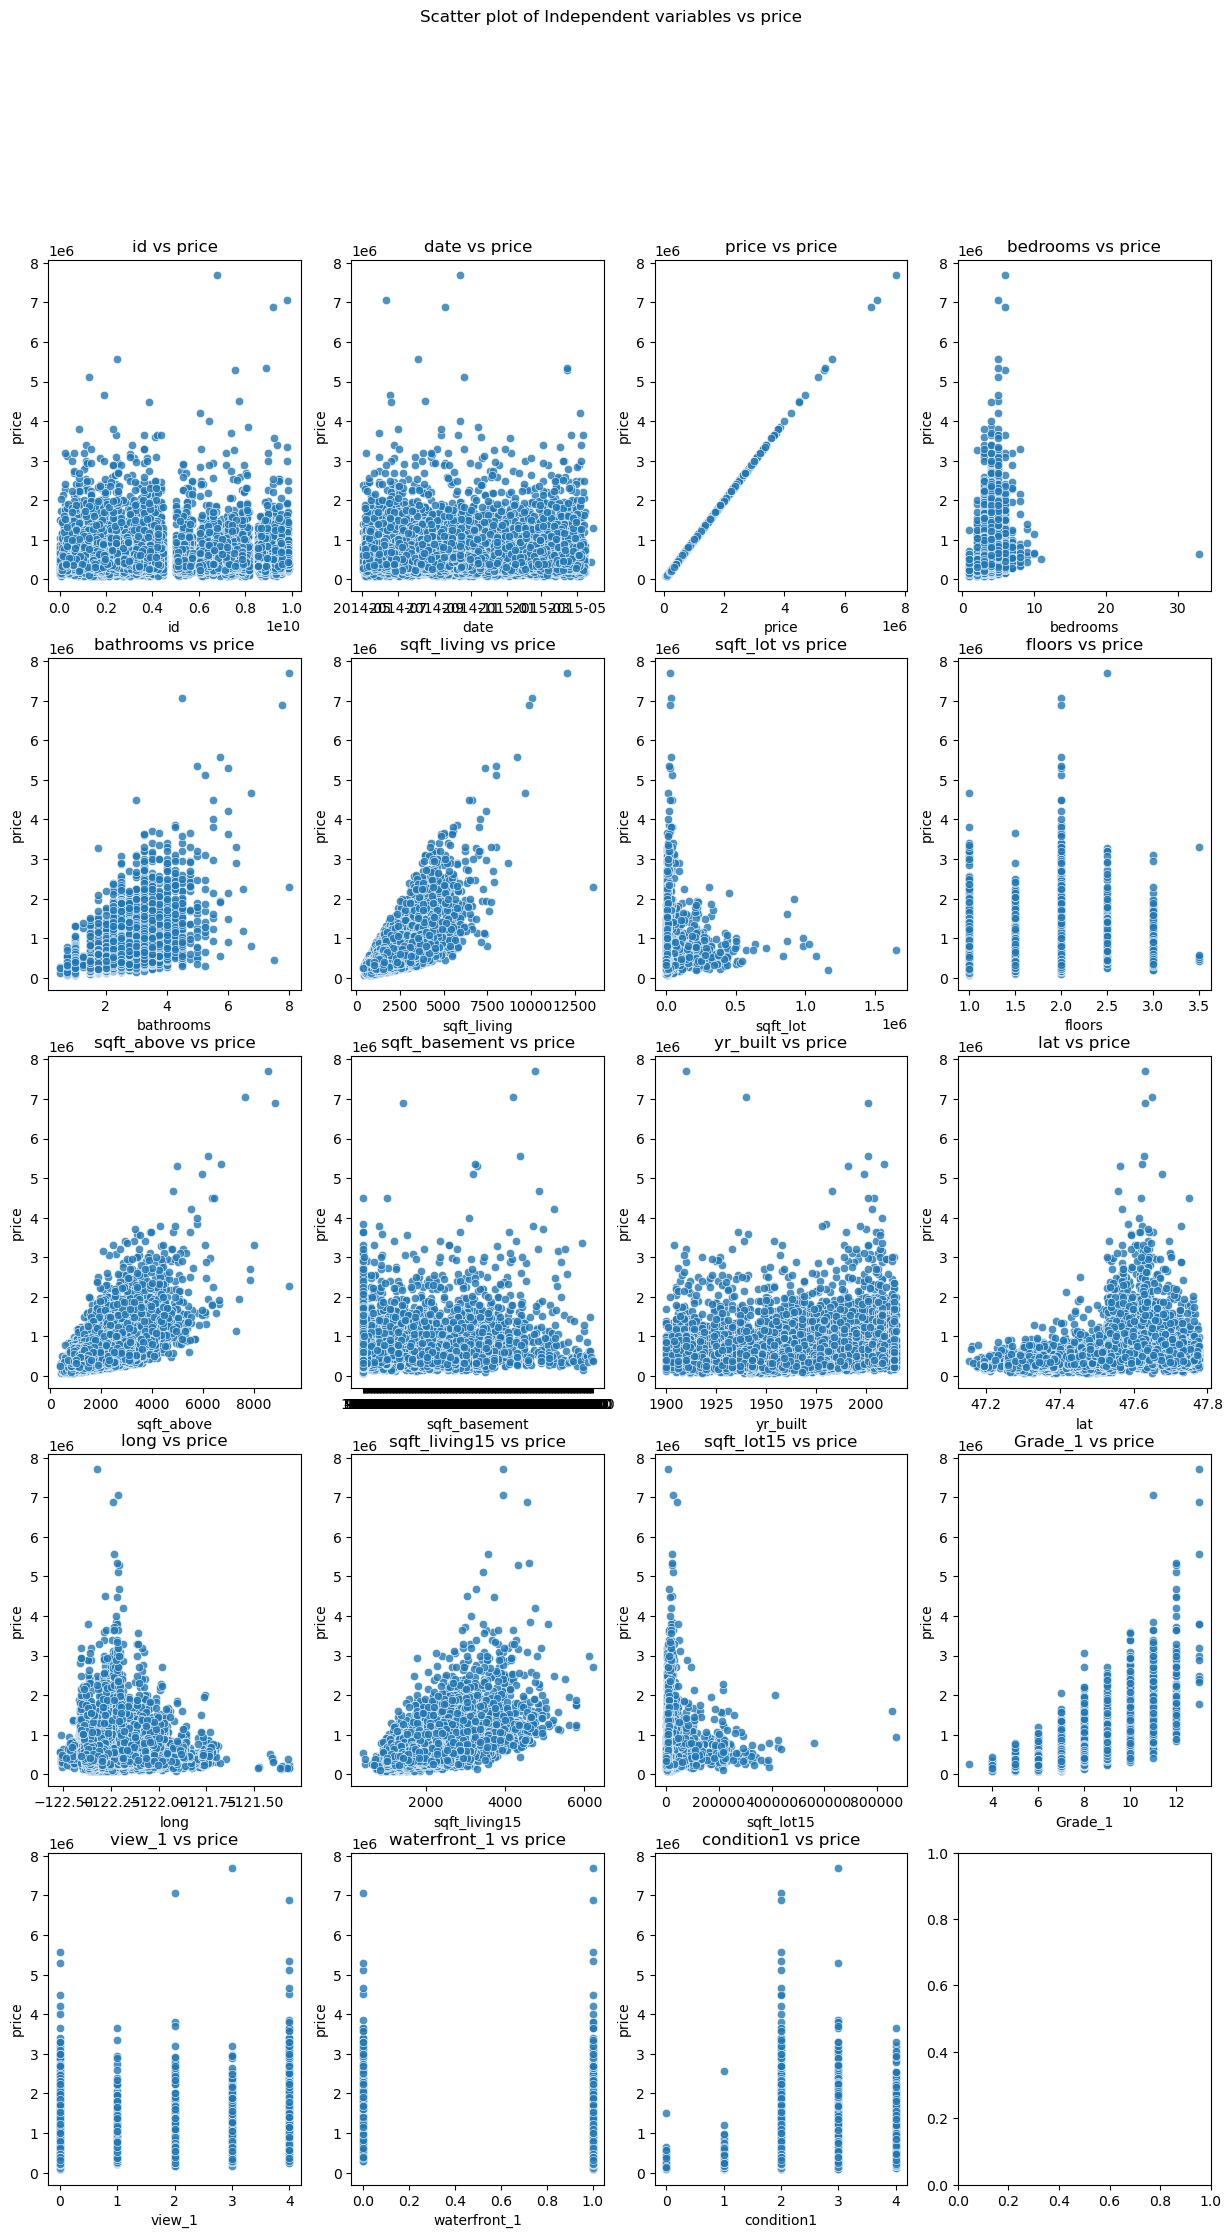

In [176]:
def scatter_plots(y, X):
    plots = X.shape[1]
    cols = 4
    rows = (plots + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    fig.suptitle(f"Scatter plot of Independent variables vs {y.name}")

    for i, ax in enumerate(axes.flat):
        if i < plots:
            x_col_name = X.columns[i]
            sns.scatterplot(x=X.iloc[:, i], y=y,ax=ax, alpha = 0.8)
            ax.set_xlabel(x_col_name)
            ax.set_ylabel(y.name)
            ax.set_title(f"{x_col_name} vs {y.name}")
            
# Run the function
scatter_plots(y, X)


The scatter plots above helps us identify columns that have a linear relationship to price and which ones do not. From the plots also we can also identify columns having categorical data .

### Relationship between our independent variables and the dependent variable("price") in terms of correlation metric


We are going to plot a correlation heatmap to hellp us visualize the correlation of our columns

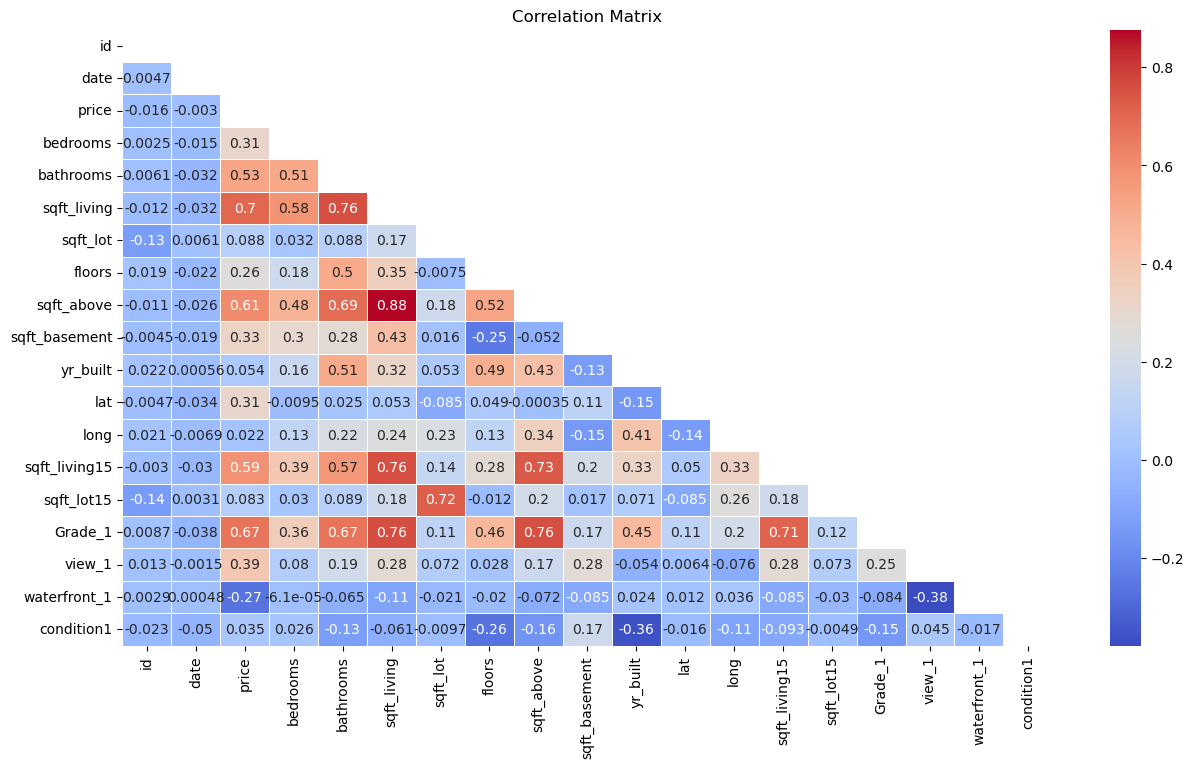

In [177]:
#correlation 
columns_to_test = X.columns

# computing the correlation matrix
correlation_matrix = data[columns_to_test].corr()
matrix = np.triu(np.ones_like(correlation_matrix, dtype = bool))
one_sided_correlation = correlation_matrix.mask(matrix)

# using heatmap to visualize the correlation
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, mask = matrix)
plt.title(f'Correlation Matrix')
plt.show()

From the correlation matrix above we can now see the relationship between each and every column in our data. We can identify those that have a positive or negative correlation and those with almost no correlation. This is an important visualization in our analysis as it helps us filter our results easily and quickly when building our regression models.

### Correlation of our columns against the target("price)


Investigating how the columns in our DataFrame are correlated with the column price 

In [178]:
#defining a function to calculate correlation
def correlation(df):
    # Excluding non-numeric columns
    numeric_df = df.select_dtypes(include=['number'])
    return numeric_df.corr()['price'].sort_values()

correlation(X)


waterfront_1    -0.265969
id              -0.015796
long             0.022101
condition1       0.035290
yr_built         0.054459
sqft_lot15       0.083192
sqft_lot         0.087937
floors           0.256355
lat              0.306507
bedrooms         0.309204
view_1           0.394885
bathrooms        0.525889
sqft_living15    0.586415
sqft_above       0.605143
Grade_1          0.667738
sqft_living      0.702328
price            1.000000
Name: price, dtype: float64

## Analyzing price and location

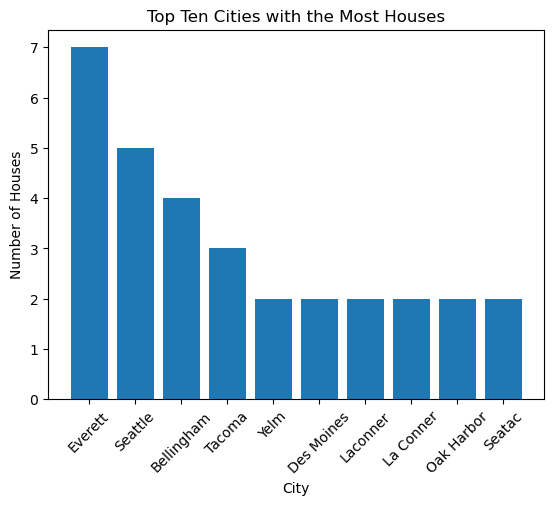

In [179]:
def create_bar_graph(data):
    # Count the occurrences of each city
    city_counts = data['City'].value_counts()

    # Select the top ten cities
    top_cities = city_counts.head(10)

    # Create a bar graph
    plt.bar(top_cities.index, top_cities.values)
    plt.xlabel('City')
    plt.ylabel('Number of Houses')
    plt.title('Top Ten Cities with the Most Houses')
    plt.xticks(rotation=45)
    plt.show()
    

# Example usage:
create_bar_graph(new_data)

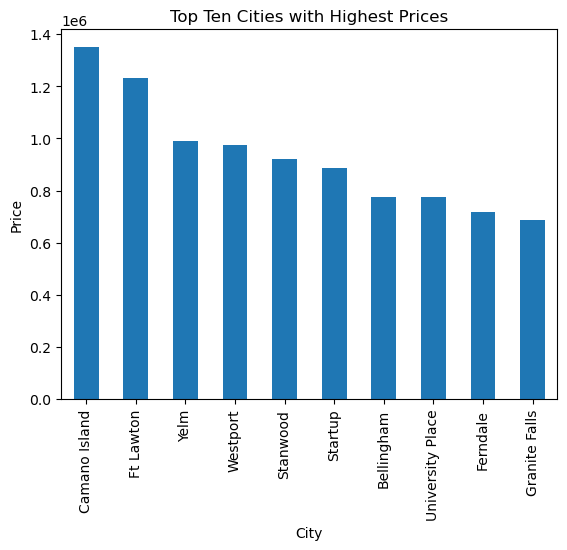

In [180]:
city_prices = new_data.groupby('City')['price'].mean()

# Select the top ten cities with the highest mean prices
top_ten_cities = city_prices.nlargest(10)

# Create a bar graph
top_ten_cities.plot(kind='bar', xlabel='City', ylabel='Price', title='Top Ten Cities with Highest Prices')

# Show the plot
plt.show()

## Analyzing seasonal trends in prices 

In [181]:
# Creating a function to map months to seasons
def get_season(date):
    if date.month in [3,4,5]:
        return 'Spring'
    elif date.month in [6,7,8]:
        return 'Summer'
    elif date.month in [9,10,11]:
        return 'Autumn'
    else:
        return 'Winter'


In [182]:
# Applying the function to the 'date' column to create a 'season' column
data['season'] = data['date'].apply(get_season)
data[['date', 'season']]

,date,season
0,2014-10-13,Autumn
1,2014-12-09,Winter
2,2015-02-25,Winter
3,2014-12-09,Winter
4,2015-02-18,Winter
...,...,...
21592,2014-05-21,Spring
21593,2015-02-23,Winter
21594,2014-06-23,Summer
21595,2015-01-16,Winter


### Creating a boxplot of price segmented by season to view differences in price distribution by season.

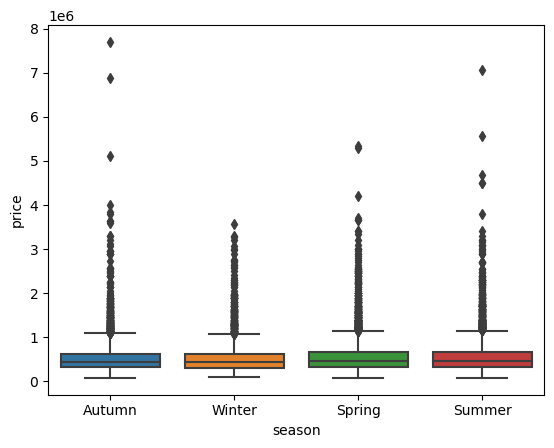

In [183]:
sns.boxplot(x='season', y='price', data=data);

### Making a timeseries plot of price over time, colored by season to see seasonal patterns.

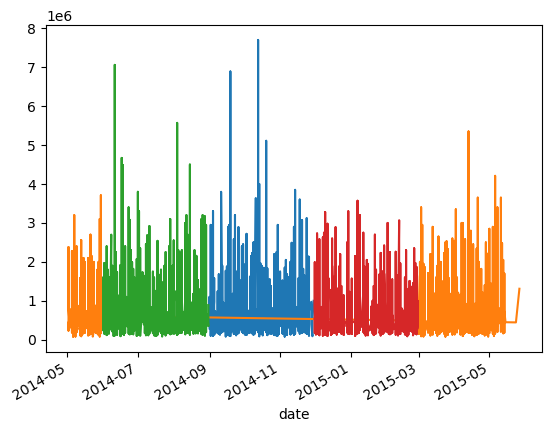

In [184]:
data.set_index('date').groupby('season')['price'].plot();

### Calculating summary statistics (mean, median, std dev) for price grouped by season to quantify differences.

In [185]:
data.groupby('season')['price'].agg([np.mean, np.median, np.std])

,mean,median,std
season,,,
Autumn,531150.968193,444250.0,377150.623574
Spring,553196.062373,464950.0,368682.049402
Summer,547051.030205,455000.0,370521.819711
Winter,519665.374965,430000.0,348671.746920


In [186]:
# Extract price by season into separate dataframes 
spring = data[data['season'] == 'Spring']['price']
summer = data[data['season'] == 'Summer']['price'] 
fall = data[data['season'] == 'Autumn']['price']
winter = data[data['season'] == 'Winter']['price']

# Perform ANOVA test
f_val, p_val = stats.f_oneway(spring, summer, fall, winter)  

print(f_val, p_val)

# Interpret results
alpha = 0.05
if p_val < alpha:
  print("We reject the null hypothesis")
  print("There is a statistically significant difference in price by season")  
else:
  print("We fail to reject the null hypothesis")
  print("There is no statistically significant difference in price by season")

8.125544621711049 2.0977402736305726e-05
We reject the null hypothesis
There is a statistically significant difference in price by season


In this case; these are the hypotheses.

Null hypothesis:

There is no difference in the mean price across the seasons. The season has no effect on price.

H0: μspring = μsummer = μfall = μwinter

Alternative hypothesis:

There is a difference in mean price for at least one season compared to the others. The season has an effect on price.

H1: At least one μ season ≠ μ other seasons

Where μseason is the population mean price for that season.

So in summary: Null hypothesis (H0): The seasons all have an equal effect on mean price (no difference). Alternative hypothesis (H1): At least two seasons have a statistically significant difference in their effect on mean price. If we reject H0 based on a small ANOVA p-value, we would conclude there is a significant difference in price by season. Failing to reject H0 means we cannot say there is a seasonal effect.

## Linear Regression
Since we now have a better understanding of the correlation between our target("price") and our features("independent variables"), we  proceed to building regression models to further understand the magnitude our features have on price and predict whether this model can give us accurate house prices when fitted with the said features. We will explore a few features from our data set which we have investigated and come to a conclusion that they have a significance on our target.Steps involved here are as follows;
1. Feature Selection
2. Model Selection
3. Model training
4. Model evaluation
5. Model interpretation
6. Model validation and testing

## 1.Feature selection
Here we just choose the endogenous and exogenous variables. First we will select for the baseline model then after we shall add features to see if it improves and evaluate it.

In [187]:
y = data["price"]
X = data["sqft_living"]

# 2. Building a baseline model
Creating  a baseline model for our regression  model

First we visualize the target(price) column in order to understand the distribution 

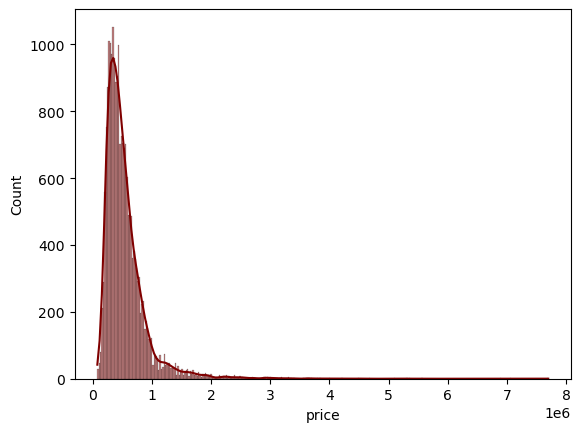

In [188]:
sns.histplot(data["price"], color="maroon", kde=True)
plt.show();

The distribution of our data seems to a have a longer right tail than the left tail. This indicates a positive skewness in our target meaning the mean is greater than the median. This may have impact on our model since linear regression, assume that the target variable follows a normal distribution, so significant skewness can be problematic.

### Splitting our data into train and test sets

First we split the data into test set and  training set. We will use the "train_test_split" function  from scikit-learn library to split our data. 

In [189]:
#importing scikit-learn library
from sklearn.model_selection import train_test_split
#defining a function for splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In the train_test_split function we have is used above, we have split 80% of the data into training set and 20% of the data into test set.

In the next cell we are going to build a baseline model using the y_train and x_train variables. To do that we import statsmodels library which is a powerful library for statistical modelling and is similar to the sci-kit learn module

In [191]:
#importing statsmodels
import statsmodels.api as sm

In [192]:
#function to create models and print the summary
model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 1.655e+04
Date:                Wed, 01 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:15:34   Log-Likelihood:            -2.3497e+05
No. Observations:               16914   AIC:                         4.700e+05
Df Residuals:                   16912   BIC:                         4.700e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.448e+04   4960.688     -8.966      0.000   -5.42e+04   -3.48e+04
sqft_living   280.1781      2.178    128.639      0.000     275.909     284.447
==============================================================================
Omnibus:                    11863.674   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           453836.272
Skew:                           2.904   Prob(JB):                         0.00
Kurtosis:                      27.703   Cond. No.                     5.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Wonderful! We now have our baseline model and from it we can interpret its metrics
### Interpretation

Looking at the summary above, we can see that the regression line we found was

price = sqft_living285.8630 - 43,990

The model is statistically significant overall, with an F-statistic p-value well below 0.05. 
The model explains about 50% of the variance in price. 
The model `const` and `sqft_living`  coefficients  are both statistically significant, with t-statistic p-values well below 0.05. 
If a house had 0 sqft of living , we would expect price to be about -43,990 dollars. 
For each increase of 1 sqft in the living , we see an associated increase in price of about 280 dollars.
 


We now have our baseline model which we created using the train sets obtained from splitting our data. To analyze our model further we will predict our target("price") using the trained model then compare metrics to determine if our model is efficient or we need to adjust it. We also check if our model is under fitted or over fitted.
To perform comparisson we will import another module from sci-kit learn 

In [193]:
#predicting the dependent varible
X_test = sm.add_constant(X_test)
y_pred = results.predict(X_test)

#defining a function to calculate metrics for our prediction model
def calculate_regression_metrics(y_test, y_pred):
    metrics = {}

    # Calculate Mean Absolute Error (MAE)
    metrics['MAE'] = mean_absolute_error(y_test, y_pred)

    # Calculate Mean Squared Error (MSE)
    metrics['MSE'] = mean_squared_error(y_test, y_pred)

    # Calculate R-squared (coefficient of determination)
    metrics['R-squared'] = r2_score(y_test, y_pred)

    return metrics


In [194]:
metrics = calculate_regression_metrics(y_test, y_pred)
print(metrics)

{'MAE': 177033.8779134571, 'MSE': 70202650031.35715, 'R-squared': 0.48779757847019756}


### Comparison of our baseline model against the prediction model

#### R-squared

Comparing the r-squared values from the test model  and and the prediction model we can note a difference. Our train model has a R-squared value of almost 50% while our test model has a value of almost 48%. This means our baseline model is good ...

#### Residuals


Residuals are the difference between the true values and the values predicted by our model. We visualize to understand the distribution and also check if it meets the assumption of linearity; that is normal distribution

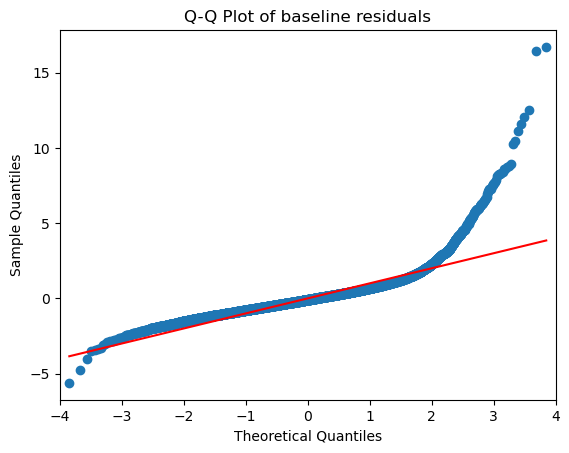

In [195]:
# Generate a Q-Q plot
sm.qqplot(results.resid, line='s', fit=True, dist=stats.norm, loc=0, scale=1)
plt.title('Q-Q Plot of baseline residuals')
plt.show()


Quantile-quantile plots are used to asses whether a dataset follows a specific theoretical normal distribution.
The visual above shows our model residuals almost follow a straight line but then curves at some point. The skewness or outliers in our target might be the cause of this.

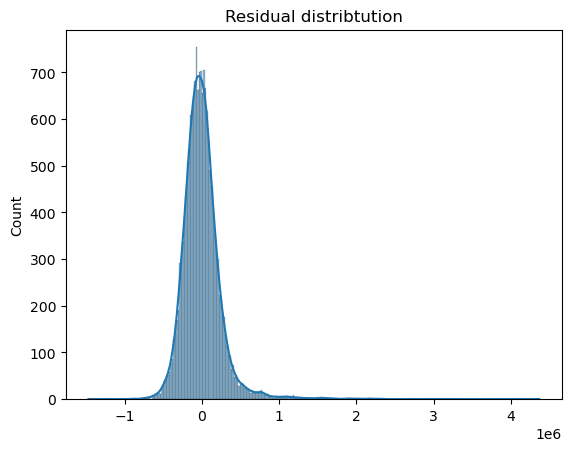

In [196]:
#ploting histogram to show residuals distribution
sns.histplot(results.resid, bins = "auto", kde = True)
plt.title("Residual distribtution")
plt.show();

From the above plot we can see that our baseline model residuals  have a normal distribution. This meets one of the linearity assumptions of linear regression. Linear models make key assumptions one of which is that the errors or residuals follow a normal distribution. The normality assumption is essential for valid statistical inferences and hypothesis testing. Non-normal residuals can lead to biased parameter estimates, incorrect p-values, and unreliable confidence intervals.

## Target transformation

The non-normal distribution shown by the residuals(where it curves above) can be accounted for by the skewness of our target. Transforming the target variable can be an effective approach to make the data more closely approximate a normal distribution. By transforming the target variable, you aim to reduce skewness and make the data more symmetric, thus bringing it closer to a normal distribution.
This, in turn, helps the residuals conform more closely to the normality assumption, which is crucial for the validity of the model. We shall log transform our target and see if our residuals will follow a normal distribution.

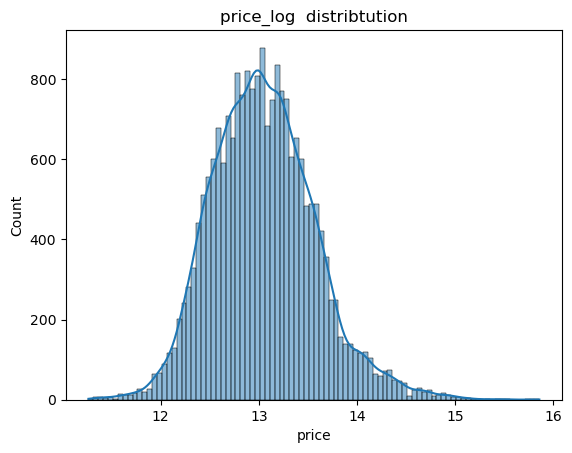

In [197]:
#log transforming the target
y_log = np.log(data["price"])
# visualizing to see its distribution
sns.histplot(y_log, bins = "auto", kde = True)
plt.title("price_log  distribtution")
plt.show();

In [198]:
#log transforming the target
y_log = np.log(data["price"])

Wonderful! Our target after transformation seems to follow an almost normal distribution. Next we create a model for the transformed target, then we shall visualize the residuals once again to see  their distribution. We will also check if it improves our model or not.

### Log transformed target model

In [199]:
#splitting data into test and train test
x_train, x_test, y_train, y_test = train_test_split(X, y_log, test_size= 0.2, random_state= 0)

##creating a model
log_model = sm.OLS(y_train, sm.add_constant(X_train))
log_results = log_model.fit()
log_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                 1.586e+04
Date:                Wed, 01 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:15:36   Log-Likelihood:                -7525.5
No. Observations:               16914   AIC:                         1.506e+04
Df Residuals:                   16912   BIC:                         1.507e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.2207      0.007   1704.768      0.000      12.207      12.235
sqft_living     0.0004   3.15e-06    125.933      0.000       0.000       0.000
==============================================================================
Omnibus:                        3.650   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                3.629
Skew:                           0.035   Prob(JB):                        0.163
Kurtosis:                       3.015   Cond. No.                     5.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpreting the results of the model

From the summary above we can see that the regression line we found was

price = sqft_living0.0004 - 12.2207

The model is statistically significant overall, with an F-statistic p-value well below 0.05. 
The model explains about 48% of the variance in price. 
The model `const` and `sqft_living`  coefficients  are both statistically significant, with t-statistic p-values well below 0.05. 
If a house had 0 sqft of living , we would expect price to be about -12.2207 dollars. 
For each increase of 1 sqft in the living , we see an associated increase in price of about 0.0004 dollars.

### Prediction of our model

In [200]:
X_test = sm.add_constant(X_test)
y_pred = results.predict(X_test)

calculate_regression_metrics(y_test, y_pred)

{'MAE': 536828.5276848675,
 'MSE': 352139274884.206,
 'R-squared': -1250053982156.9246}

Visualizing the transformed target residuals

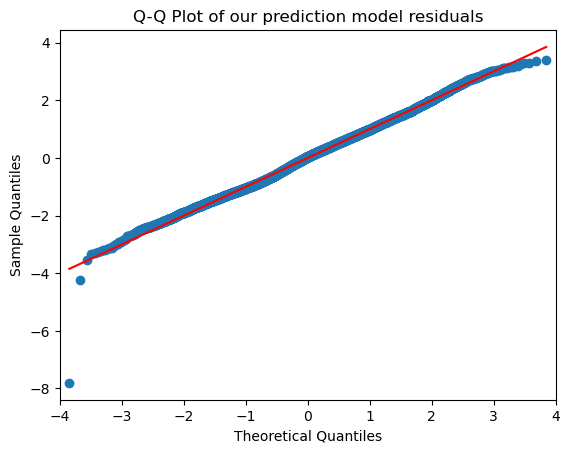

In [201]:



# Generate a Q-Q plot
sm.qqplot(log_results.resid, line='s', fit=True, dist=stats.norm, loc=0, scale=1)
plt.title('Q-Q Plot of our prediction model residuals')
plt.show()



The residuals of the log transformed target now follow a straight line compared to our first model. This is a good indication since it now meets the assumption of normal distribution.

### Evaluation between the two baseline models

## 2nd Model

The first baseline model is much better than the second baseline model since it explains almost 50% in variance of the target variable compared to the second one which explains almost 48%. The second model prediction is also very poor since it has a negative R-squared value which indicates that the regression model's fit to the data is worse  the model is not explaining any of the variance in the dependent variable, and it might be a poor fit for the data. 

In this model we are going to improve our first baseline model which we did't transform by adding more features and see if our model is going to improve. 

Selecting y and X variables for our model

In [202]:
#defining variables tu be used in our second model
drop = data.drop(['id', 'price', 'date','sqft_lot','floors','sqft_basement',  'yr_renovated', 'zipcode',
'lat', 'long', 'sqft_living15', 'sqft_lot15', "sqft_above"], axis= 1)
X_sec = drop.copy()
#converting seasons into numeric values instead of string
X_sec['season'] = X_sec['season'].replace({'Autumn': 1, 'Winter':2,'Spring':3,'Summer':4})
y_sec= data["price"]
X_sec

,bedrooms,bathrooms,sqft_living,yr_built,Grade_1,view_1,waterfront_1,condition1,season
0,3,1.00,1180,1955,7,0,1,2,1
1,3,2.25,2570,1951,7,0,1,2,2
2,2,1.00,770,1933,6,0,1,2,2
3,4,3.00,1960,1965,7,0,1,4,2
4,3,2.00,1680,1987,8,0,1,2,2
...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,2009,8,0,1,2,3
21593,4,2.50,2310,2014,8,0,1,2,2
21594,2,0.75,1020,2009,7,0,1,2,4
21595,3,2.50,1600,2004,8,0,1,2,2


In this model we have standardized the X variables (features) to have a mean of 0 and a standard deviation of 1 is known as standardization or z-score normalization.Scaling the features to have a standard deviation of 1 ensures that the features have the same variance, which can be important for modelling algorithms.Standardizing the features can help make the data closer to a normal distribution, which can improve the model's performance for such models.


In [203]:
ss = StandardScaler()

X1_scaled = ss.fit_transform(X_sec)

splitting data into train and test

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X1_scaled, y_sec, test_size= 0.2, random_state= 0)


Building multiple linear model

In [205]:
model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     3483.
Date:                Wed, 01 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:15:39   Log-Likelihood:            -2.3187e+05
No. Observations:               16914   AIC:                         4.638e+05
Df Residuals:                   16904   BIC:                         4.638e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.393e+05   1673.138    322.341      0.000    5.36e+05    5.43e+05
x1         -3.478e+04   2110.893    -16.478      0.000   -3.89e+04   -3.06e+04
x2          4.245e+04   2881.866     14.728      0.000    3.68e+04    4.81e+04
x3          1.513e+05   3353.541     45.122      0.000    1.45e+05    1.58e+05
x4         -1.044e+05   2181.947    -47.861      0.000   -1.09e+05      -1e+05
x5          1.496e+05   2817.068     53.121      0.000    1.44e+05    1.55e+05
x6          3.154e+04   1925.042     16.385      0.000    2.78e+04    3.53e+04
x7         -5.408e+04   1871.949    -28.891      0.000   -5.78e+04   -5.04e+04
x8          1.095e+04   1802.650      6.075      0.000    7417.906    1.45e+04
x9          4833.2831   1675.649      2.884      0.004    1548.836    8117.730
==============================================================================
Omnibus:                    12607.193   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           827348.046
Skew:                           2.997   Prob(JB):                         0.00
Kurtosis:                      36.735   Cond. No.                         4.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our model is good overall with an R-squared value of 65% meaning it explains 65 % ov variance in our target variable. The t statistics p-values of our independent variables are below 0.05 meaning our model is statistically significant overall.

In [206]:
X_test = sm.add_constant(X_test)
y_pred = results.predict(X_test)

calculate_regression_metrics(y_test, y_pred)


{'MAE': 141577.487213883,
 'MSE': 46856182040.19083,
 'R-squared': 0.6581347015546128}

### Comparing the train and test model of our multiple linear model

The R-squared of our train model is 65% and that of our test model is also 65%. This is can be an indication that our model is performing consistently between the training and test datasets. This can be a positive sign, suggesting that our model has not overfit the training data. This is a good model because the test model has not predicted more than what the train model predicted

metrics

## 3. Polynomial  Transformation of  features

We will use polynomial transformation to see if our model will improve or not.

In [207]:
# Polynomial transforming
y_pol= data["price"]
X_pol = X_sec

He we also standardized our data to have a mean of 0 and standard deviation of 1

In [208]:
ss = StandardScaler()

X1_scaled = ss.fit_transform(X_pol)

splitting the data

In [209]:
x_train, x_test, y_train, y_test = train_test_split(X_pol, y_pol, test_size= 0.2, random_state= 0 )


Building the polynomial model after transforming the independent variables into polynomial features

In [210]:

def build_polynomial_linear_model(X, y, degree=2):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)

    # Add a constant term (intercept)
    X_poly = sm.add_constant(X_poly)

    # Build and fit a linear regression model using statsmodels
    model = sm.OLS(y, X_poly).fit()

    return model

In [211]:
# Build the polynomial linear model
model = build_polynomial_linear_model(X_train, y_train, degree=2)

# Print the summary of the model
# model

In [212]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     805.1
Date:                Wed, 01 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:15:41   Log-Likelihood:            -2.3008e+05
No. Observations:               16914   AIC:                         4.603e+05
Df Residuals:                   16860   BIC:                         4.607e+05
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.841e+05   3623.103    133.617      0.000    4.77e+05    4.91e+05
x1         -1.517e+04   2241.795     -6.765      0.000   -1.96e+04   -1.08e+04
x2          3.184e+04   2948.276     10.799      0.000    2.61e+04    3.76e+04
x3          1.021e+05   3623.094     28.175      0.000     9.5e+04    1.09e+05
x4         -7.149e+04   2590.576    -27.597      0.000   -7.66e+04   -6.64e+04
x5          1.358e+05   2721.017     49.905      0.000     1.3e+05    1.41e+05
x6          1.881e+04   5011.581      3.754      0.000    8989.906    2.86e+04
x7          3.942e+04    306.256    128.700      0.000    3.88e+04       4e+04
x8          1.912e+04   2441.815      7.829      0.000    1.43e+04    2.39e+04
x9          1866.5612   1596.379      1.169      0.242   -1262.508    4995.631
x10          555.9042    263.172      2.112      0.035      40.060    1071.749
x11         4565.4476   2942.348      1.552      0.121   -1201.863    1.03e+04
x12        -3519.5469   3410.988     -1.032      0.302   -1.02e+04    3166.346
x13        -3385.3137   2324.352     -1.456      0.145   -7941.288    1170.660
x14        -2953.1406   3042.235     -0.971      0.332   -8916.240    3009.959
x15          521.2019   2047.169      0.255      0.799   -3491.464    4533.868
x16        -4333.6116   1965.530     -2.205      0.027   -8186.257    -480.967
x17         -760.8905   2062.605     -0.369      0.712   -4803.812    3282.031
x18         2587.7006   2011.488      1.286      0.198   -1355.026    6530.427
x19        -5594.0740   2636.248     -2.122      0.034   -1.08e+04    -426.752
x20         8143.7624   4519.811      1.802      0.072    -715.541     1.7e+04
x21         1.163e+04   3243.284      3.586      0.000    5274.359     1.8e+04
x22         1.932e+04   4113.875      4.696      0.000    1.13e+04    2.74e+04
x23        -1141.1333   2501.285     -0.456      0.648   -6043.913    3761.646
x24        -9161.4758   2164.098     -4.233      0.000   -1.34e+04   -4919.617
x25          693.4558   2783.977      0.249      0.803   -4763.430    6150.342
x26        -1078.8393   2589.803     -0.417      0.677   -6155.125    3997.446
x27         -864.7976   2941.214     -0.294      0.769   -6629.885    4900.289
x28        -3.182e+04   3794.308     -8.387      0.000   -3.93e+04   -2.44e+04
x29         4.287e+04   4675.011      9.169      0.000    3.37e+04     5.2e+04
x30        -1.983e+04   2657.572     -7.462      0.000    -2.5e+04   -1.46e+04
x31        -2.086e+04   1945.323    -10.723      0.000   -2.47e+04    -1.7e+04
x32         8211.5042   3550.698      2.313      0.021    1251.765    1.52e+04
x33         -776.4852   3032.140     -0.256      0.798   -6719.797    5166.827
x34          2.41e+04   1927.525     12.504      0.000    2.03e+04    2.79e+04
x35        -2.356e+04   3210.254     -7.340      0.000   -2.99e+04   -1.73e+04
x3

In [213]:
# Get the coefficients
coefficients = model.params

# Get the parameter information (which includes coefficients, standard errors, t-values, and p-values)
params = model.summary().tables[1]

print("Coefficients:")
print(coefficients[:5])

# print("\nParameters:")
# print(params.astype(object))



Coefficients:
const    484108.442278
x1       -15165.237748
x2        31838.202391
x3       102080.216087
x4       -71491.003750
dtype: float64


### Interpreting the polynomial results

Our model is good overall with an R-squared value of 71% meaning it explains 71 % ov variance in our target variable. The p-values of our independent variables are below 0.05 meaning our model is statistically significant overall.

Prediction metrics

In [214]:
X_test = sm.add_constant(X_test)
y_pred = results.predict(X_test)

calculate_regression_metrics(y_test, y_pred)

{'MAE': 141577.487213883,
 'MSE': 46856182040.19083,
 'R-squared': 0.6581347015546128}

### Comparing the polynomial train and test model

On looking on the metrics of the two models we can say that our training data did well in training the model. We can  see that the test model has a R-squared value of 65 while our training model has a R-squared of 71%. This shows our test model predicts well since it did not exceed the training model value and it also means that we did not overfit our data. This is also our best model since mit explains 71% of the variance of the target feature explained by the independent variables(features)

## Summary on evaluation.
The models that we have constructed has given us a more in depth understanding on the association of the various house features and the prices.The model we finally came up with explains 72% proportion of the variance in the dependent variable (price) that is explained by the independent variables (features) in our regression model.This is the best model we have come up with after tuning and transforming features, this is the model with the least Mean Absolute Error(MAE) and the smaller the MAE the better the model  Most of the households that would love to purchase houses in King County can now have a general idea of the criteria of house pricing, where each social class(rich, middle class etc) live and also which are the most expensive cities to own a house. In conclusion, the biggest contributors to pricing in a house is the square footage of the living space, square footage of the house excluding the basement and the grade of the house.These are the features which had high value of positive correlation with our target(price). This analysis will help a lot in the real estate sector
## LIMITATIONS

Our analysis relied on a limited selection of data sets (two). More data would have given us a further analysis.

## NEXT STEPS

Incorporate more stakeholders like Architects
Explore more complex models in the near future  for better analysis and results. This models includes Lasso regression, Random forest, XGboost and many more